In [1]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Downloads\Breast_GSE45827.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
df['type'].value_counts()

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

In [4]:
new_df = df[df['type'] != 'cell_line' ]
new_df = new_df[new_df['type'] != 'normal']
new_df.shape      

(130, 54677)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

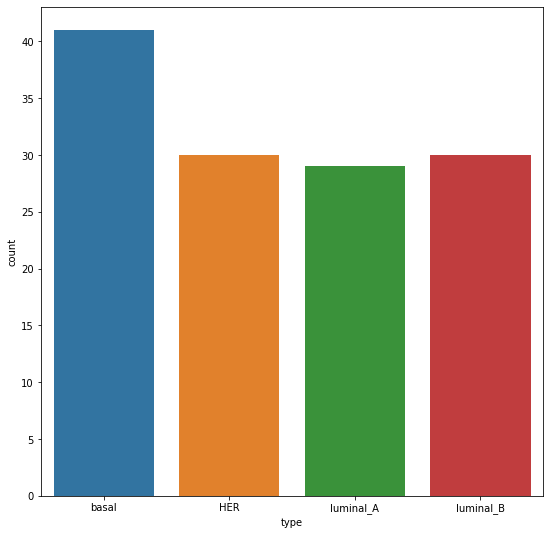

In [5]:
plt.figure(figsize = (9,9))
sns.countplot(new_df['type'])

In [6]:
X = new_df.drop(['samples', 'type'],axis = 1)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(new_df['type'])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)


In [8]:
#Standardization of data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled,y_train))

y_pred = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.8846153846153846
[[5 2 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 1 5]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled,y_train))

y_pred = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

0.8173076923076923
0.7307692307692307
[[5 3 0 0]
 [0 7 0 0]
 [0 0 6 4]
 [0 0 0 1]]


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled,y_train))


y_pred = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))    

1.0
0.8846153846153846
[[5 2 0 0]
 [0 8 0 0]
 [0 0 5 0]
 [0 0 1 5]]


In [12]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))

y_pred = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.8846153846153846
[[4 1 0 0]
 [1 9 0 0]
 [0 0 5 0]
 [0 0 1 5]]


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 91).fit(X_train_scaled)
print(pca.explained_variance_ratio_.cumsum())

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

[0.11192213 0.1851001  0.23040978 0.27254999 0.30777403 0.33460666
 0.35845937 0.37755736 0.39495494 0.41186522 0.42782081 0.44306471
 0.45686886 0.47014236 0.48313362 0.49591789 0.50806984 0.51977854
 0.53138894 0.54242796 0.5534401  0.56399284 0.57445563 0.58474735
 0.59459041 0.60425323 0.61360672 0.62291966 0.63211212 0.64115458
 0.65001981 0.65879562 0.66727261 0.67559373 0.68384181 0.69192232
 0.69990818 0.70778192 0.71555728 0.7231829  0.73076041 0.73830785
 0.74568595 0.75285665 0.75993333 0.76696397 0.77386947 0.78065798
 0.78738744 0.79403259 0.80059398 0.80708669 0.81348064 0.81982958
 0.82610358 0.83227325 0.83840877 0.84443748 0.85039618 0.85627503
 0.86208587 0.8678616  0.87359981 0.87925913 0.88487876 0.89044414
 0.89593838 0.9013429  0.90673459 0.9120524  0.91730634 0.92252526
 0.92753728 0.93247492 0.93733988 0.94216303 0.94691974 0.9516646
 0.95629414 0.96084396 0.96537604 0.96981883 0.97417249 0.978392
 0.98247986 0.98640591 0.99019138 0.99373518 0.99696917 1.
 1.   

In [42]:
model = LogisticRegression()
model.fit(X_train_scaled_pca,y_train)
print(model.score(X_train_scaled_pca,y_train))

y_pred = model.predict(X_test_scaled_pca)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.8974358974358975
[[10  3  0  0]
 [ 0 11  0  0]
 [ 0  0  9  1]
 [ 0  0  0  5]]


In [43]:
model = RandomForestClassifier()
model.fit(X_train_scaled_pca, y_train)
print(model.score(X_train_scaled_pca,y_train))


y_pred = model.predict(X_test_scaled_pca)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.7948717948717948
[[ 7  0  0  0]
 [ 3 13  1  0]
 [ 0  0  6  1]
 [ 0  1  2  5]]


In [20]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {
    'n_estimators':[100,150,200,250,300,350,400,600],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,8,12,16,20,40],
    'criterion':['gini','entropy']
}

gs = RandomizedSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(X_train_scaled,y_train)
print(gs_results.best_score_)
print(gs_results.best_params_)

0.978494623655914
{'n_estimators': 150, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'entropy'}


In [44]:
model = RandomForestClassifier(n_estimators = 150, max_features = 'auto', max_depth = 12, criterion = 'entropy')

model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled,y_train))

y_pred = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test)) 

1.0
0.9230769230769231
[[10  3  0  0]
 [ 0 11  0  0]
 [ 0  0  9  0]
 [ 0  0  0  6]]


In [50]:
grid_params = {
    'penalty':['none','l2','l1','elasticnet'],
    'max_iter':[100,300,400,500,600,700],
    'C':[0.1,1,10,100]
    
}

gs = RandomizedSearchCV(
    LogisticRegression(),
    grid_params,
    cv = 4
)

gs_results = gs.fit(X_train_scaled,y_train)
print(gs_results.best_score_)
print(gs_results.best_params_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8784585  0.91156126        nan        nan 0.9451581         nan
        nan 0.8784585         nan 0.8784585 ]
  warnings.warn(


0.9451581027667985
{'penalty': 'l2', 'max_iter': 400, 'C': 10}


In [51]:
model = LogisticRegression(penalty = 'l2', max_iter = 400, C = 10)
model.fit(X_train_scaled_pca,y_train)
print(model.score(X_train_scaled_pca,y_train))

y_pred = model.predict(X_test_scaled_pca)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.8974358974358975
[[10  3  0  0]
 [ 0 11  0  0]
 [ 0  0  9  1]
 [ 0  0  0  5]]
